In [5]:
import os
import numpy as np
import pandas as pd

In [6]:
filepath = r'C:/Users/user/Downloads/Iris/iris_data.csv'
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#number of rows
print(data.shape[0])

#column names
print(data.columns.tolist())

#data types
print(data.dtypes)


150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [8]:
#remove the prefix -iris to make the species name shorter
#use string processing method or apply method

data['species'] = data.species.str.replace('iris-', '')

#using apply method
#data['species']= data.species.apply(lambda r: r.replace('iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#determine numberof each species present
#the mean, median, quantities and ranges(max-min) for each petal and sepal measurement

data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [12]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%','range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace= True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [13]:
#for each species calculate mean of each measurement and median of each measurement

data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [14]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [15]:
#alternaively we can apply all functions at once

data.groupby('species').agg(['mean','median']) #parse a list of recognized strings
data.groupby('species').agg([np.mean, np.median]) #xplicit aggregate functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [16]:
agg_dict = {field: ['mean','median'] for field in data.columns if field != 'species'}
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median']}

In [17]:
agg_dict['petal length'] ='max'
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median'],
 'petal length': 'max'}

In [18]:
#aggregate fields differently

from pprint import pprint
agg_dict = {field: ['mean','median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

In [19]:
#make a scatterplot of sepal length vs sepal width
import matplotlib.pyplot as plt
%matplotlib inline

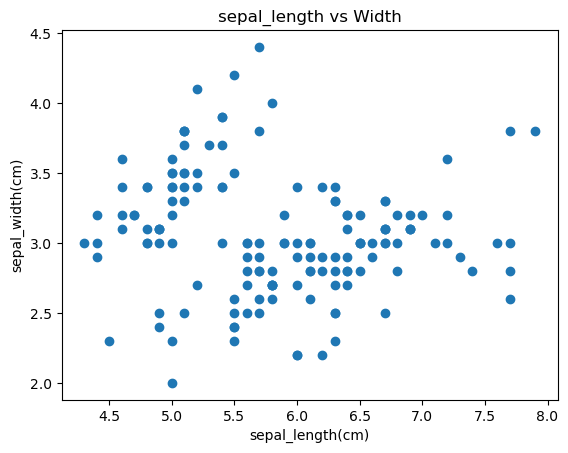

In [20]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

#label
ax.set(xlabel = 'sepal_length(cm)',
      ylabel = 'sepal_width(cm)',
      title = 'sepal_length vs Width');


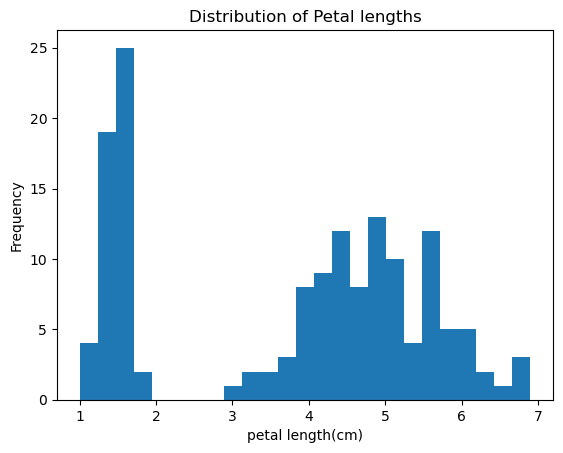

In [21]:
#Q: make a histogram of any of the features and label appropriately 
#plot functionality using matplotlib

ax = plt.axes()
ax.hist(data.petal_length, bins= 25) #you can use pandas functionality as alternative; ax=data.petal_length.plot.hist(bins=25)

ax.set(xlabel ='petal length(cm)',
      ylabel = 'Frequency',
      title = 'Distribution of Petal lengths');

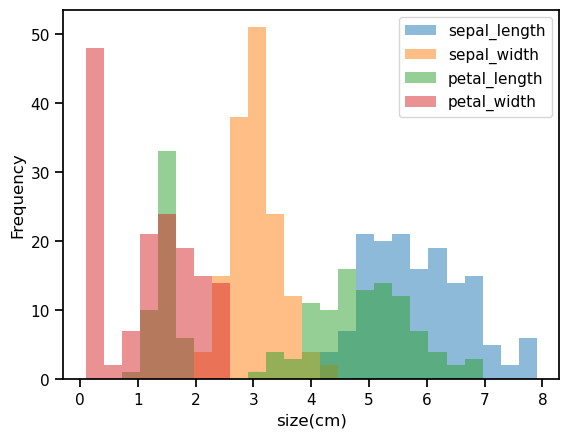

In [22]:
#Q: create a single plot with histograms for each feature overlayed and then try to create 4 individual histograms in a single figure each plot having at least one feature

import seaborn as sns
sns.set_context('notebook')

ax = data.plot.hist(bins = 25, alpha= 0.5) #alpha makes it more transparent for visibility of the overlay
ax.set_xlabel('size(cm)');

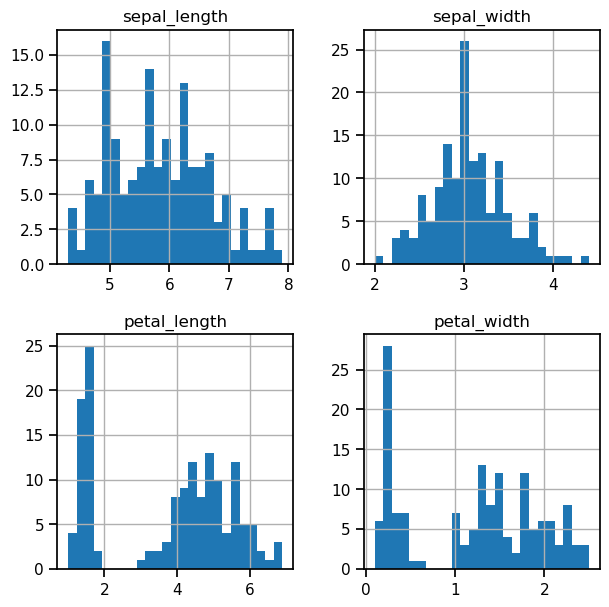

In [24]:
axList = data.hist(bins=25, figsize = (7,7))


In [25]:
#metadata for our histograms
axList


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

AttributeError: 'Axes' object has no attribute 'is_last_row'

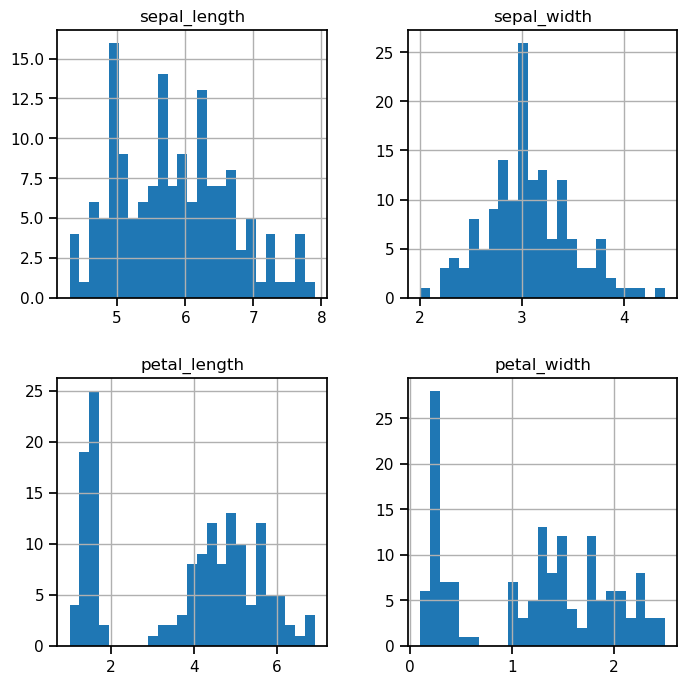

In [32]:
#using pandas .hist method to create separate figures
axList = data.hist(bins=25, figsize=(8,8))

#x and y labels to first column and last row 
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size(cm)')
    
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

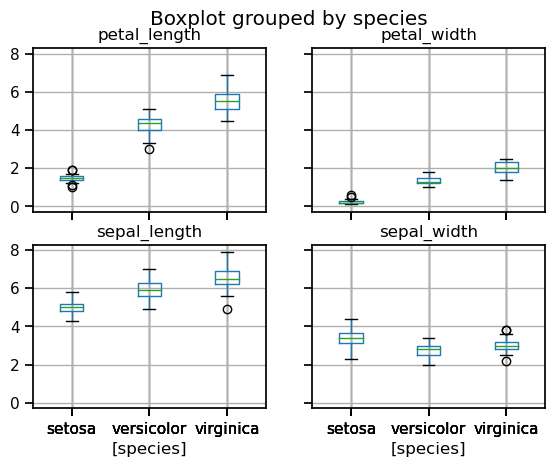

In [34]:
#use pandas to make a boxplot of each petal and sepal measurement
data.boxplot(by = 'species')

In [37]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
#Q:make a single boxplot where the features are separated in the x-axis and species colored with different hues
#first reshape df to have single measurement in each column (seaborn is picky on data format)

plot_data = (data
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0: 'size', 'level_1': 'measurement'})
            )
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


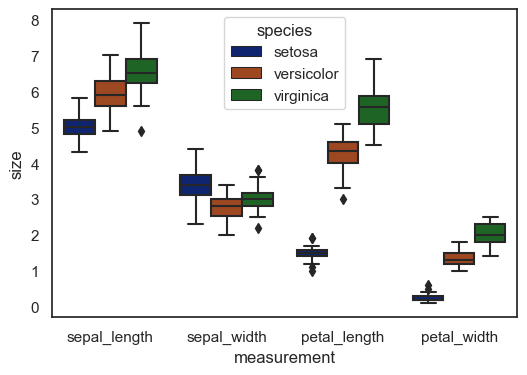

In [40]:
#now plot the df using seaborn
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f= plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y= 'size',
            hue='species', data=plot_data);


In [ ]:
#Q: make a pairplot with seaborn to examine correlation between each of the measurements


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


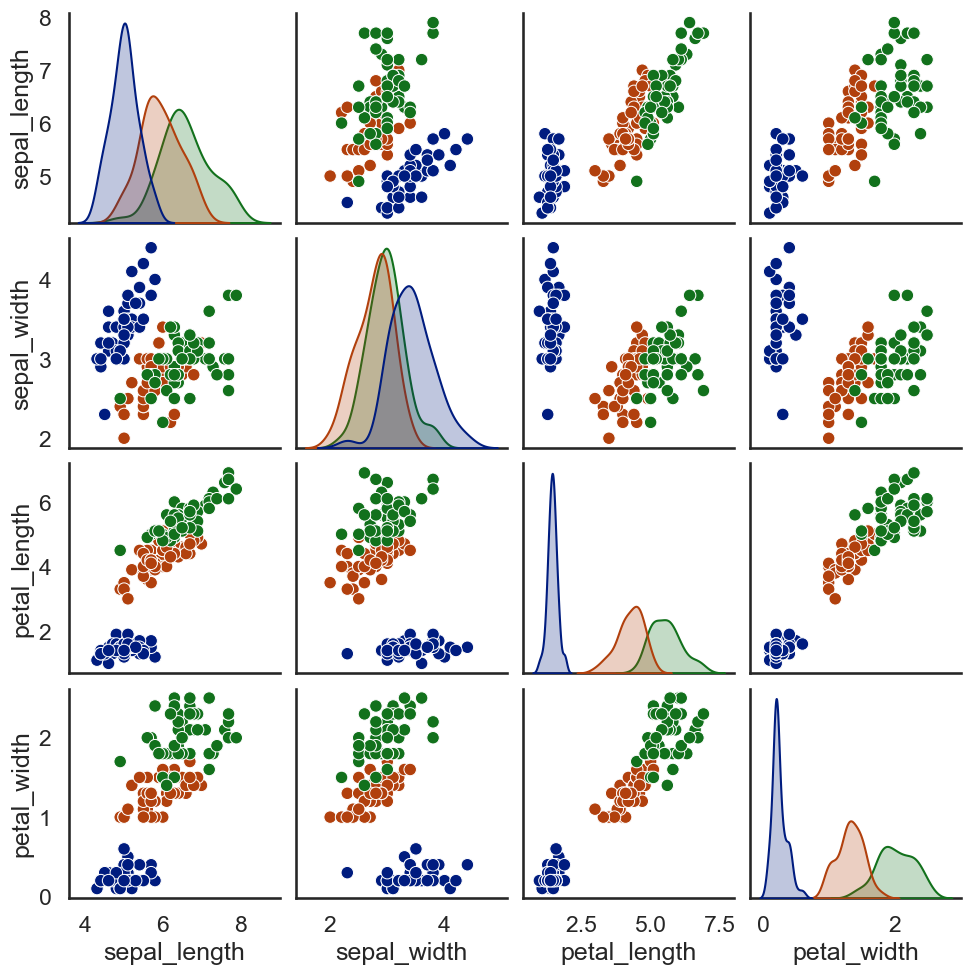

In [41]:
sns.set_context('talk')
plot = sns.pairplot(data, hue ='species')
plot._legend.remove()
plot